# 🛴 Scooter Rental Data Analysis
Author: Logan Kaliba  
**Description:** This notebook explores a dataset of scooter rentals. We'll analyze how weather and time-related features affect ridership, visualize trends, and build a simple linear regression model to predict scooter demand.

# === 1. Import Libraries ===

In [2]:
# Import the appropriate Python libraries.
import pandas as pd

# === 2. Load Dataset ===

In [3]:
# Load the CSV file into a dataframe.
scooter_data = pd.read_csv('https://bit.ly/scooter-rentals')

# === 3. Data Exploration ===

In [4]:
# Calculate the dimensions of the dataset.
scooter_data.shape # 731 records, 14 columns

(731, 14)

In [5]:
# List the columns in the dataset along with their data types.
scooter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            731 non-null    int64  
 1   date          731 non-null    object 
 2   yr            731 non-null    int64  
 3   mnth          731 non-null    int64  
 4   weekday       731 non-null    int64  
 5   workday       731 non-null    int64  
 6   season        731 non-null    int64  
 7   holiday       731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  wind          731 non-null    float64
 12  unregistered  731 non-null    int64  
 13  registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


# === 4. Rename Columns ===

In [6]:
# Change the following field names to make them easier to understand:

# Change “yr” to “year”
# Change “mnth” to “month”
# Change “hum” to “humidity_norm”
# Change “temp” to “temp_norm”
# Change “atemp” to “temp_felt_norm”
# “Change “wind” to “wind_norm”
# Change “registered” to “rentals_registered”
# Change “unregistered” to “rentals_unregistered”
# Relist all the columns to confirm the changes above were completed successfully.
scooter_data = scooter_data.rename(columns={'yr': 'year',
                             'mnth': 'month',
                             'hum': 'humidity_norm',
                             'temp': 'temp_norm',
                             'atemp': 'temp_felt_norm',
                             'wind': 'wind_norm',
                             'registered': 'rentals_registered',
                             'unregistered': 'rentals_unregistered'})

In [7]:
# Preview the first 5 records in the dataset.
scooter_data.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


# === 5. Replace Data (Seasons) ===

In [8]:
# In the “season” field, replace the numbers (1, 2, 3, 4) with the following season names:

# 1 = “winter”
# 2 = “spring”
# 3 = “summer”
# 4 = “fall"
scooter_data['season'] = scooter_data['season'].replace([1, 2, 3, 4], ['winter', 'spring', 'summer', 'fall'])
scooter_data.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518


# === 6. Feature Engineering ===

In [9]:
# Creating a new column called "rentals_total" that sums registered and unregistered rentals.
scooter_data['rentals_total'] = scooter_data['rentals_registered'] + scooter_data['rentals_unregistered']
scooter_data.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# Descriptive stats for the numeric columns in the dataset.
scooter_data.describe()

,ID,year,month,weekday,workday,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,0.683995,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,0.465233,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,1.000000,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,1.000000,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# === 7. Missing Values & Duplicates ===

In [11]:
# Seeing if there are any missing values in the dataset.
scooter_data.isnull().sum()

,0
ID,0
date,0
year,0
month,0
weekday,0
workday,0
season,0
holiday,0
temp_norm,0
temp_felt_norm,0


In [12]:
sum(scooter_data.duplicated(scooter_data.columns))

0

# === 8. Visualizations & Correlation ===

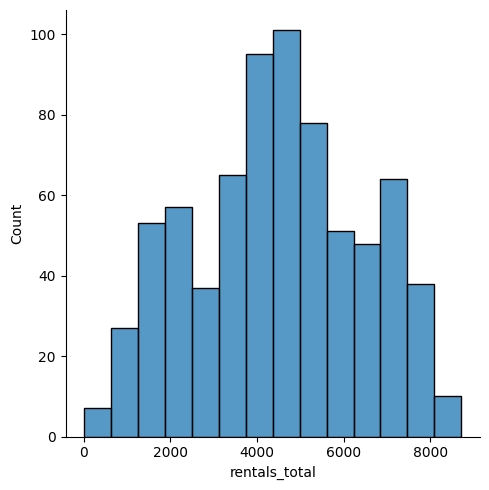

In [13]:
import seaborn as sns
# Generating a histogram to visualize the distribution of "rentals_total" column.
sns.displot(scooter_data['rentals_total'])

<Axes: xlabel='rentals_unregistered', ylabel='rentals_registered'>

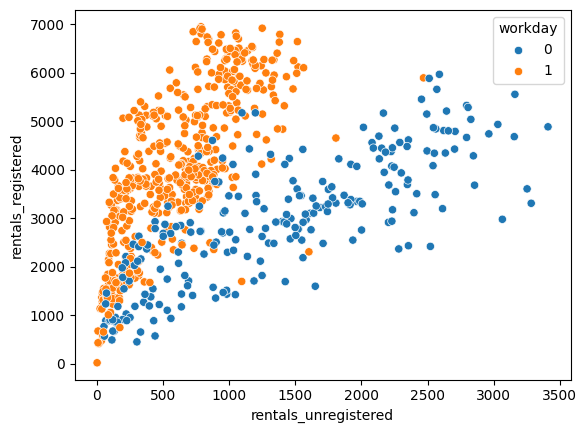

In [14]:
# Generating a scatterplot that has "rentals_unregistered" on the x-axis and "rentals_registered" on the y-axis.
# Then, I colored the datapoints based on whether or not it was a workday.
# This was to help me understand the types of scooter rentals on weekdays versus weekends.
# (As a note, when “workday” is 0, it is a weekend – Saturday or Sunday.)
sns.scatterplot(data=scooter_data, x='rentals_unregistered', y='rentals_registered', hue='workday')

In [ ]:
# Based on the scatterplot, we have more registered rentals on weekdays and more unregistered rentals on weekends.

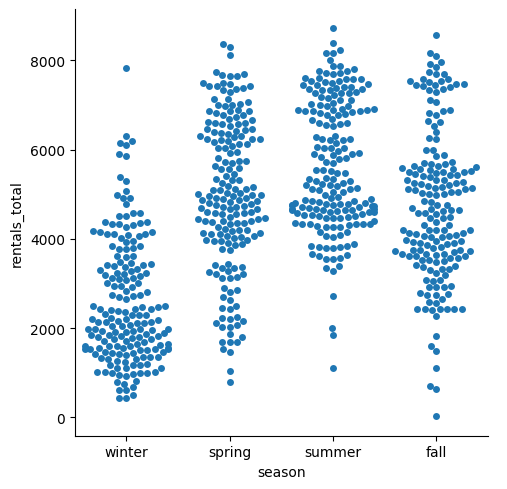

In [15]:
# Generating a swarmplot to explore the total rentals by season.  The "season" is on the x-asis and "rentals_total" on the y-axis.
sns.catplot(data=scooter_data, x='season', y='rentals_total', kind='swarm')

In [ ]:
# Based on the swarmplot, it appears that winter has the lowest average daily rentals.

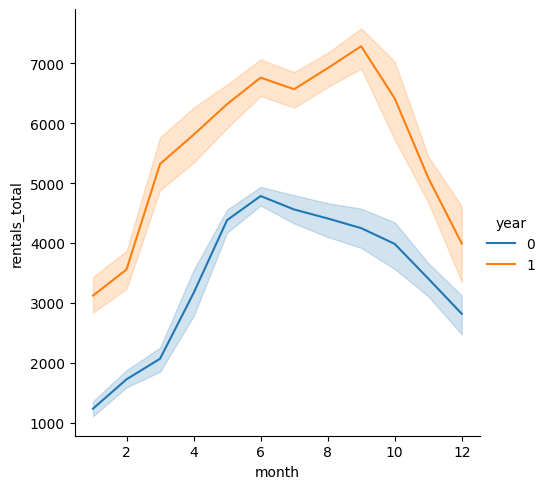

In [16]:
# Generating a line plot that shows average daily rentals by month with the lines split by year.
# The "month" should on the x-axis, the "rentals_total" on the y-axis, and there should be a line for each value in the "year" column.
sns.relplot(data=scooter_data, x='month', y='rentals_total', hue='year', kind='line')

In [ ]:
# Based on the lineplot, the average daily rentals increased between the first year in the data ("year" = 0) and the second year ("year" = 1).

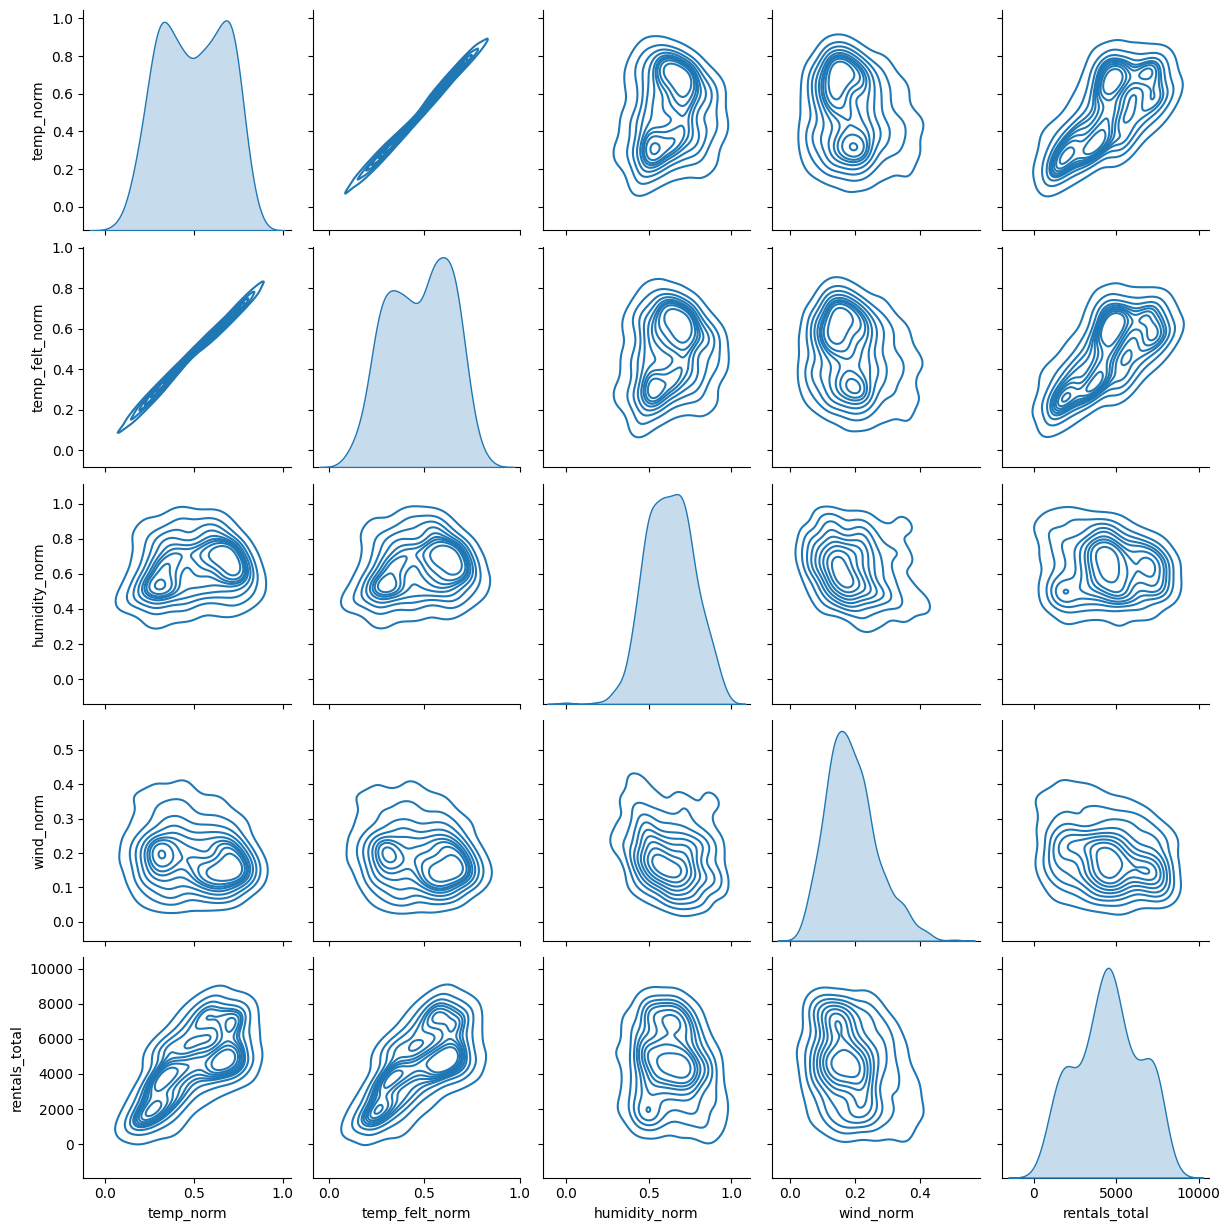

In [17]:
# Generating a pairplot to show the relationship between "rentals_total" and the weather indicators ("temp_norm", "temp_felt_norm", "humidity_norm", and "wind_norm"), which are continuous variables.
sns.pairplot(scooter_data, vars=['temp_norm', 'temp_felt_norm', 'humidity_norm', 'wind_norm', 'rentals_total'], kind='kde')

In [ ]:
# As "temp_norm" decreases, "rentals_total" tends to decrease.

<Axes: >

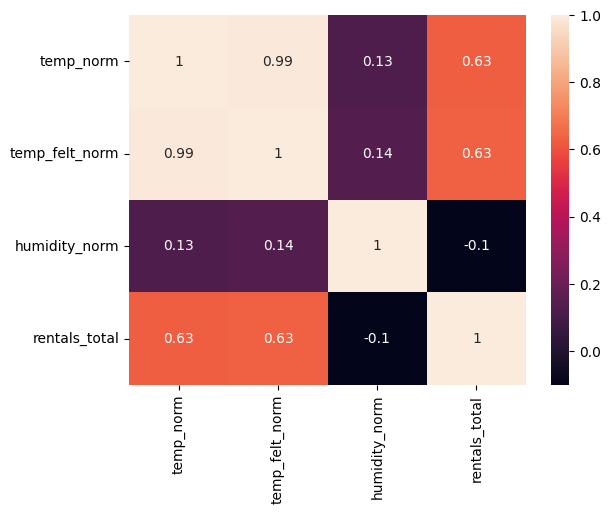

In [18]:
# Generating a heatmap to visualize the correlation between "rentals_total" and the weather indicators mentioned in the pairplot with their correlations coefficients shown on the heatmap.
scooter_data_dp = scooter_data.drop(columns=['ID', 'date', 'year', 'month', 'weekday', 'workday', 'season', 'holiday', 'wind_norm', 'rentals_registered', 'rentals_unregistered'])
sns.heatmap(scooter_data_dp.corr(), annot=True)

In [ ]:
# The correlation coefficient (r) that quantifies the strength of the relationship between "rentals_total" and "temp_norm" is 0.63

In [19]:
scooter_data_dp.corr() # double-checking

,temp_norm,temp_felt_norm,humidity_norm,rentals_total
temp_norm,1.000000,0.991702,0.126963,0.627494
temp_felt_norm,0.991702,1.000000,0.139988,0.631066
humidity_norm,0.126963,0.139988,1.000000,-0.100659
rentals_total,0.627494,0.631066,-0.100659,1.000000


# === 9. Modeling Preparation ===

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
# Separate the dependent variable (use "rentals_total") (y) and the independent variable (use "temp_norm") (X).
X = scooter_data[['temp_norm']]
y = scooter_data['rentals_total']

In [22]:
# Split the data into training and test sets.  (I put 25% into the test set.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# === 10. Model Building & Evaluation ===

In [23]:
# Train ("fit") the linear regression model using the training data.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Building

In [27]:
# The intercept of my regression equation
print(model.intercept_) # 1,327.93

1327.930810368468


In [28]:
# The coefficient for the "temp_norm" variable within my regression equation
print(model.coef_) # 6,463.97

[6463.96764523]


In [29]:
# Using my regression equation, I predicted the "rentals_total" when "temp_norm" = 0.30.
new_X = [[0.30]]
print(model.predict(new_X)) # Answer is 3,267.12 rentals

[3267.12110394]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# Now, before moving forward, I will now use the regression model to predict total scooter rentals in the test data and store my predictions in a variable called "y_pred".
y_pred = model.predict(X_test.values)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
# I will now evaluate the performance of my regression model (r-squared).
metrics.r2_score(y_test, y_pred) # My r-squared is 0.37, which means the performance of this regression model is moderate

0.37540464616240443